In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=1.15, style='whitegrid')

In [2]:
files_style_1 = [
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2012-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2013-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2014-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2015-data.xls'
]

files_style_2 = [
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2016-data.xls',
]

files_style_3 = [
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2017-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2018-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2019-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2020-data.xlsx',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2021-data.xlsx',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2022-data.xlsx',
    'data/raw/EEX EUA Auctions/primary_auction_report_20230214_39969994.xlsx'
]

In [3]:
eua_auctions = pd.Series(dtype='float64')
for file in files_style_1:
    eua_auctions = pd.concat([
        eua_auctions,
        pd.read_excel(
            file,
            header=2,
            index_col='Date',
            parse_dates=True
        )['Auction Price €/tCO2']
    ])

for file in files_style_2:
    eua_auctions = pd.concat([
        eua_auctions,
        pd.read_excel(
            file,
            header=2,
            index_col='Date',
            parse_dates=True
        )['Auction Price EUR/tCO2']
    ])

for file in files_style_3:
    eua_auctions = pd.concat([
        eua_auctions,
        pd.read_excel(
            file,
            header=5,
            index_col='Date',
            parse_dates=True
        )['Auction Price €/tCO2']
    ])

c:\Users\linus\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\linus\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\linus\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\linus\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
eua_auctions.sample(n=10).sort_values()

2013-12-16 00:00:00     4.71
2013-01-22 00:00:00     4.88
2013-09-09 00:00:00     5.38
2012-12-04 00:00:00     5.82
2016-06-10 09:00:00     5.93
2015-12-14 00:00:00     7.92
2018-11-19 00:00:00    18.43
2020-03-13 00:00:00    22.78
2019-06-13 00:00:00    24.92
2020-08-28 00:00:00    29.50
dtype: float64

Text(0.5, 0, 'Date')

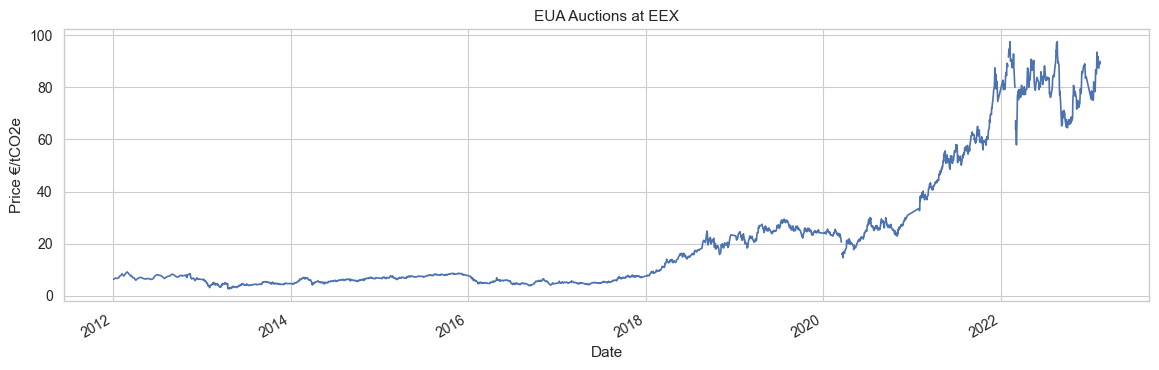

In [5]:
fig, ax = plt.subplots(figsize=(14, 4))
eua_auctions.plot(ax=ax)

ax.set_title('EUA Auctions at EEX')
ax.set_ylabel('Price €/tCO2e')
ax.set_xlabel('Date')